In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession
import pandas as pd

In [3]:
spark = SparkSession.builder \
    .appName("practices") \
    .getOrCreate()

In [4]:
spark

In [5]:
print(spark.version)

3.5.2


In [6]:
type(pd.read_csv("Chennai house data.csv")) 

pandas.core.frame.DataFrame

# reading csv and storig the columns in columns box

In [7]:
df_spark = spark.read.option("Header","True").csv("Chennai house data.csv",inferSchema=True)
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [8]:
df_spark.show(5)

+-----+----+------------------+---+--------+----+----------+--------------------+
|price|area|            status|bhk|bathroom| age|  location|             builder|
+-----+----+------------------+---+--------+----+----------+--------------------+
|37.49| 872|     Ready to move|  2|    NULL|   1| Sembakkam|       MP Developers|
|93.54|1346|Under Construction|  3|       2|NULL|  Selaiyur|       DAC Promoters|
|151.0|2225|Under Construction|  3|    NULL|   0| Mogappair|Casagrand Builder...|
| 49.0|1028|     Ready to move|  2|       2|   3|  Ambattur|Dugar Housing Bui...|
|42.28| 588|Under Construction|  2|       1|   0|Pallavaram|Radiance Realty D...|
+-----+----+------------------+---+--------+----+----------+--------------------+
only showing top 5 rows



In [9]:
df_spark.printSchema()    #like df.info()

root
 |-- price: double (nullable = true)
 |-- area: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- bhk: integer (nullable = true)
 |-- bathroom: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- builder: string (nullable = true)



# Another way to read the dataset

In [10]:
df_spark = spark.read.csv("Chennai house data.csv",header = True, inferSchema = True)

In [11]:
df_spark.show(5)

+-----+----+------------------+---+--------+----+----------+--------------------+
|price|area|            status|bhk|bathroom| age|  location|             builder|
+-----+----+------------------+---+--------+----+----------+--------------------+
|37.49| 872|     Ready to move|  2|    NULL|   1| Sembakkam|       MP Developers|
|93.54|1346|Under Construction|  3|       2|NULL|  Selaiyur|       DAC Promoters|
|151.0|2225|Under Construction|  3|    NULL|   0| Mogappair|Casagrand Builder...|
| 49.0|1028|     Ready to move|  2|       2|   3|  Ambattur|Dugar Housing Bui...|
|42.28| 588|Under Construction|  2|       1|   0|Pallavaram|Radiance Realty D...|
+-----+----+------------------+---+--------+----+----------+--------------------+
only showing top 5 rows



In [12]:
df_spark.printSchema()    

root
 |-- price: double (nullable = true)
 |-- area: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- bhk: integer (nullable = true)
 |-- bathroom: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- builder: string (nullable = true)



# what is dataframe ?
dataframe is one kind of the data structure, we can perform various type of operation in the dataframe

In [13]:
df_spark.columns

['price', 'area', 'status', 'bhk', 'bathroom', 'age', 'location', 'builder']

In [14]:
df_spark.select("price","area").show(5)           #select is used for the specify columns to select
df_spark.select("location").show(5)

+-----+----+
|price|area|
+-----+----+
|37.49| 872|
|93.54|1346|
|151.0|2225|
| 49.0|1028|
|42.28| 588|
+-----+----+
only showing top 5 rows

+----------+
|  location|
+----------+
| Sembakkam|
|  Selaiyur|
| Mogappair|
|  Ambattur|
|Pallavaram|
+----------+
only showing top 5 rows



In [15]:
df_spark.dtypes

[('price', 'double'),
 ('area', 'int'),
 ('status', 'string'),
 ('bhk', 'int'),
 ('bathroom', 'int'),
 ('age', 'int'),
 ('location', 'string'),
 ('builder', 'string')]

In [16]:
df_spark.describe().show(5)

+-------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|summary|             price|              area|            status|               bhk|          bathroom|               age|     location|     builder|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|  count|              2620|              2620|              2620|              2620|              1403|              1729|         2620|        2620|
|   mean| 93.83468320610666|1282.9251908396946|              NULL|2.4438931297709923| 2.359230220955096|1.3551185656448814|         NULL|        NULL|
| stddev|113.60934931337222| 692.5663187698266|              NULL|0.8119836251037046|0.8449514283614394|2.1026819845567295|         NULL|        NULL|
|    min|             12.83|               300|     Ready to move|                 1|         

# adding the columns

In [17]:
# using withColumns

dummy = df_spark.withColumn("Age after two year",df_spark["age"]+2)
dummy.show(5)

+-----+----+------------------+---+--------+----+----------+--------------------+------------------+
|price|area|            status|bhk|bathroom| age|  location|             builder|Age after two year|
+-----+----+------------------+---+--------+----+----------+--------------------+------------------+
|37.49| 872|     Ready to move|  2|    NULL|   1| Sembakkam|       MP Developers|                 3|
|93.54|1346|Under Construction|  3|       2|NULL|  Selaiyur|       DAC Promoters|              NULL|
|151.0|2225|Under Construction|  3|    NULL|   0| Mogappair|Casagrand Builder...|                 2|
| 49.0|1028|     Ready to move|  2|       2|   3|  Ambattur|Dugar Housing Bui...|                 5|
|42.28| 588|Under Construction|  2|       1|   0|Pallavaram|Radiance Realty D...|                 2|
+-----+----+------------------+---+--------+----+----------+--------------------+------------------+
only showing top 5 rows



# droping column

In [18]:
df_spark = df_spark.drop("Age after two year","bathroom")
df_spark.show(5)

+-----+----+------------------+---+----+----------+--------------------+
|price|area|            status|bhk| age|  location|             builder|
+-----+----+------------------+---+----+----------+--------------------+
|37.49| 872|     Ready to move|  2|   1| Sembakkam|       MP Developers|
|93.54|1346|Under Construction|  3|NULL|  Selaiyur|       DAC Promoters|
|151.0|2225|Under Construction|  3|   0| Mogappair|Casagrand Builder...|
| 49.0|1028|     Ready to move|  2|   3|  Ambattur|Dugar Housing Bui...|
|42.28| 588|Under Construction|  2|   0|Pallavaram|Radiance Realty D...|
+-----+----+------------------+---+----+----------+--------------------+
only showing top 5 rows



# renaming the columns

In [19]:
df_spark.withColumnRenamed("price","Price").show(5)

+-----+----+------------------+---+----+----------+--------------------+
|Price|area|            status|bhk| age|  location|             builder|
+-----+----+------------------+---+----+----------+--------------------+
|37.49| 872|     Ready to move|  2|   1| Sembakkam|       MP Developers|
|93.54|1346|Under Construction|  3|NULL|  Selaiyur|       DAC Promoters|
|151.0|2225|Under Construction|  3|   0| Mogappair|Casagrand Builder...|
| 49.0|1028|     Ready to move|  2|   3|  Ambattur|Dugar Housing Bui...|
|42.28| 588|Under Construction|  2|   0|Pallavaram|Radiance Realty D...|
+-----+----+------------------+---+----+----------+--------------------+
only showing top 5 rows



# Handling missing value

In [20]:
from pyspark.ml.feature import Imputer
imputer = Imputer(
    inputCols = ["age"],
    outputCols = ["age"]).setStrategy("mean")


df = imputer.fit(df_spark).transform(df_spark)
df.show(15)

+-----+----+------------------+---+---+-------------+--------------------+
|price|area|            status|bhk|age|     location|             builder|
+-----+----+------------------+---+---+-------------+--------------------+
|37.49| 872|     Ready to move|  2|  1|    Sembakkam|       MP Developers|
|93.54|1346|Under Construction|  3|  1|     Selaiyur|       DAC Promoters|
|151.0|2225|Under Construction|  3|  0|    Mogappair|Casagrand Builder...|
| 49.0|1028|     Ready to move|  2|  3|     Ambattur|Dugar Housing Bui...|
|42.28| 588|Under Construction|  2|  0|   Pallavaram|Radiance Realty D...|
|188.0|2221|Under Construction|  3|  0|Virugambakkam|Traventure Homes ...|
| 38.0| 885|Under Construction|  3|  0|Thirumazhisai|           Urbanrise|
|72.99| 936|     Ready to move|  3|  6|   Moolakadai|Navin Housing Pro...|
|125.0|2275|     Ready to move|  4|  1|Ottiyambakkam|Jones foundation ...|
|24.56| 622|Under Construction|  2|  0|Perungalathur|          Isha Homes|
|67.87|1305|Under Constru

In [21]:
df.describe().show(5)

+-------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|summary|             price|              area|            status|               bhk|               age|     location|     builder|
+-------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|  count|              2620|              2620|              2620|              2620|              2620|         2620|        2620|
|   mean| 93.83468320610666|1282.9251908396946|              NULL|2.4438931297709923| 1.234351145038168|         NULL|        NULL|
| stddev|113.60934931337222| 692.5663187698266|              NULL|0.8119836251037046|1.7162285383748437|         NULL|        NULL|
|    min|             12.83|               300|     Ready to move|                 1|                 0|    Adambakam|24K Realtors|
|    max|            1422.0|              6700|Under Construction|          

# Filter function

In [22]:
df.filter("price >= 1000").show()

+------+----+-------------+---+---+----------+--------------------+
| price|area|       status|bhk|age|  location|             builder|
+------+----+-------------+---+---+----------+--------------------+
|1397.0|6500|Ready to move|  5|  2|Royapettah|        Vinay Asrani|
|1397.0|6498|Ready to move|  5|  2|Royapettah|        Vinay Asrani|
|1422.0|6617|Ready to move|  5|  2|Royapettah|        Vinay Asrani|
|1050.0|4200|Ready to move|  6|  1|   T Nagar|Shree sakthivel r...|
+------+----+-------------+---+---+----------+--------------------+



In [23]:
df.filter((df["price"] >= 1000) & (df["bhk"] >= 6)).select("location").show()

+--------+
|location|
+--------+
| T Nagar|
+--------+



In [24]:
df.select("location").show()

+--------------+
|      location|
+--------------+
|     Sembakkam|
|      Selaiyur|
|     Mogappair|
|      Ambattur|
|    Pallavaram|
| Virugambakkam|
| Thirumazhisai|
|    Moolakadai|
| Ottiyambakkam|
| Perungalathur|
| Gerugambakkam|
|    Anna Nagar|
|   Gopalapuram|
|        Pammal|
|         Porur|
|      Navallur|
| Thirumazhisai|
|    Anna Nagar|
|Sholinganallur|
|     Vanagaram|
+--------------+
only showing top 20 rows



# GroupBy function

In [25]:
df.groupBy("location").min().filter(df["location"] == "Royapettah").show()

+----------+----------+---------+--------+--------+
|  location|min(price)|min(area)|min(bhk)|min(age)|
+----------+----------+---------+--------+--------+
|Royapettah|      83.0|      600|       1|       0|
+----------+----------+---------+--------+--------+



In [26]:
df.groupBy("location").max().filter(df["location"] == "Royapettah").show()

+----------+----------+---------+--------+--------+
|  location|max(price)|max(area)|max(bhk)|max(age)|
+----------+----------+---------+--------+--------+
|Royapettah|    1422.0|     6617|       8|       6|
+----------+----------+---------+--------+--------+



In [27]:
df.groupBy("location").count().filter(df["location"] == "Royapettah").show()

+----------+-----+
|  location|count|
+----------+-----+
|Royapettah|   24|
+----------+-----+



# aggregate

In [28]:
df.agg({"price":"sum"}).show()

+------------------+
|        sum(price)|
+------------------+
|245846.86999999944|
+------------------+



# basic linear model

In [29]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [30]:
assemble = VectorAssembler(inputCols=["area","bhk","age",],outputCol="inputcolumns")

In [31]:
output = assemble.transform(df)
output.show(5)

+-----+----+------------------+---+---+----------+--------------------+----------------+
|price|area|            status|bhk|age|  location|             builder|    inputcolumns|
+-----+----+------------------+---+---+----------+--------------------+----------------+
|37.49| 872|     Ready to move|  2|  1| Sembakkam|       MP Developers| [872.0,2.0,1.0]|
|93.54|1346|Under Construction|  3|  1|  Selaiyur|       DAC Promoters|[1346.0,3.0,1.0]|
|151.0|2225|Under Construction|  3|  0| Mogappair|Casagrand Builder...|[2225.0,3.0,0.0]|
| 49.0|1028|     Ready to move|  2|  3|  Ambattur|Dugar Housing Bui...|[1028.0,2.0,3.0]|
|42.28| 588|Under Construction|  2|  0|Pallavaram|Radiance Realty D...| [588.0,2.0,0.0]|
+-----+----+------------------+---+---+----------+--------------------+----------------+
only showing top 5 rows



In [32]:
final = output.select("inputcolumns","price")
final.show(5)

+----------------+-----+
|    inputcolumns|price|
+----------------+-----+
| [872.0,2.0,1.0]|37.49|
|[1346.0,3.0,1.0]|93.54|
|[2225.0,3.0,0.0]|151.0|
|[1028.0,2.0,3.0]| 49.0|
| [588.0,2.0,0.0]|42.28|
+----------------+-----+
only showing top 5 rows



In [33]:
train_data,test_data = final.randomSplit([0.8,0.2])
lr = LinearRegression(featuresCol="inputcolumns",labelCol="price")
lr_model = lr.fit(train_data)

In [34]:
print("Coefficients: ", lr_model.coefficients)
print("Intercept: ", lr_model.intercept)

Coefficients:  [0.14678061274660098,-11.828527300309537,-0.392654130512842]
Intercept:  -64.9114347006039


In [35]:
test_results = lr_model.evaluate(test_data)

test_results.predictions.show()
print("Root Mean Squared Error (RMSE):", test_results.rootMeanSquaredError)
print("R^2 on test data:", (test_results.r2)*100,"%")
print("Mean Absolute Error (MAE):", test_results.meanAbsoluteError)


+---------------+-----+--------------------+
|   inputcolumns|price|          prediction|
+---------------+-----+--------------------+
|[319.0,1.0,0.0]| 16.0|  -29.91694653474773|
|[338.0,1.0,0.0]|15.04| -27.128114892562316|
|[353.0,1.0,0.0]| 18.0|   -24.9264057013633|
|[420.0,1.0,3.0]| 22.0|  -16.27006703887956|
|[430.0,1.0,1.0]|22.99| -14.016952650387864|
|[450.0,1.0,1.0]| 15.0| -11.081340395455854|
|[476.0,1.0,0.0]|22.84|  -6.872390333531378|
|[500.0,1.0,1.0]| 22.0|  -3.742309758125799|
|[500.0,1.0,1.0]| 29.0|  -3.742309758125799|
|[520.0,1.0,3.0]|18.49| -1.5920057642194507|
|[525.0,1.0,1.0]|28.35|-0.07279443946076469|
|[540.0,1.0,1.0]| 26.0|  2.1289147517382503|
|[546.0,1.0,1.0]|28.43|  3.0095984282178563|
|[549.0,1.0,3.0]|34.46|  2.6646320054319688|
|[550.0,1.0,3.0]| 16.5|  2.8114126181785792|
|[582.0,1.0,2.0]|32.01|    7.90104635658264|
|[582.0,2.0,2.0]| 25.0| -3.9274809437268985|
|[585.0,1.0,1.0]|47.07|   8.734042325335295|
|[586.0,1.0,1.0]| 28.0|   8.880822938081906|
|[586.0,1.

In [36]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|summary|             price|              area|            status|               bhk|               age|     location|     builder|
+-------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|  count|              2620|              2620|              2620|              2620|              2620|         2620|        2620|
|   mean| 93.83468320610666|1282.9251908396946|              NULL|2.4438931297709923| 1.234351145038168|         NULL|        NULL|
| stddev|113.60934931337222| 692.5663187698266|              NULL|0.8119836251037046|1.7162285383748437|         NULL|        NULL|
|    min|             12.83|               300|     Ready to move|                 1|                 0|    Adambakam|24K Realtors|
|    max|            1422.0|              6700|Under Construction|          

# handling the catorgical value to numerical 

In [37]:
from pyspark.ml.feature import StringIndexer

In [38]:
index = StringIndexer(inputCols=["status","location","builder"],outputCols = ["status_index","location_index","builder_index"])

In [39]:
df = index.fit(df).transform(df)

In [40]:
df.show(5)

+-----+----+------------------+---+---+----------+--------------------+------------+--------------+-------------+
|price|area|            status|bhk|age|  location|             builder|status_index|location_index|builder_index|
+-----+----+------------------+---+---+----------+--------------------+------------+--------------+-------------+
|37.49| 872|     Ready to move|  2|  1| Sembakkam|       MP Developers|         0.0|          10.0|         37.0|
|93.54|1346|Under Construction|  3|  1|  Selaiyur|       DAC Promoters|         1.0|           5.0|          7.0|
|151.0|2225|Under Construction|  3|  0| Mogappair|Casagrand Builder...|         1.0|          23.0|          6.0|
| 49.0|1028|     Ready to move|  2|  3|  Ambattur|Dugar Housing Bui...|         0.0|          21.0|        102.0|
|42.28| 588|Under Construction|  2|  0|Pallavaram|Radiance Realty D...|         1.0|          18.0|         18.0|
+-----+----+------------------+---+---+----------+--------------------+------------+----

In [41]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [42]:
vec = VectorAssembler(inputCols=["area","status_index","bhk","age","builder_index"],outputCol="independent_cols")
final = vec.transform(df)
final.show(5)

+-----+----+------------------+---+---+----------+--------------------+------------+--------------+-------------+--------------------+
|price|area|            status|bhk|age|  location|             builder|status_index|location_index|builder_index|    independent_cols|
+-----+----+------------------+---+---+----------+--------------------+------------+--------------+-------------+--------------------+
|37.49| 872|     Ready to move|  2|  1| Sembakkam|       MP Developers|         0.0|          10.0|         37.0|[872.0,0.0,2.0,1....|
|93.54|1346|Under Construction|  3|  1|  Selaiyur|       DAC Promoters|         1.0|           5.0|          7.0|[1346.0,1.0,3.0,1...|
|151.0|2225|Under Construction|  3|  0| Mogappair|Casagrand Builder...|         1.0|          23.0|          6.0|[2225.0,1.0,3.0,0...|
| 49.0|1028|     Ready to move|  2|  3|  Ambattur|Dugar Housing Bui...|         0.0|          21.0|        102.0|[1028.0,0.0,2.0,3...|
|42.28| 588|Under Construction|  2|  0|Pallavaram|Radia

In [43]:
val = final.select("independent_cols","price")
val.show(5)

+--------------------+-----+
|    independent_cols|price|
+--------------------+-----+
|[872.0,0.0,2.0,1....|37.49|
|[1346.0,1.0,3.0,1...|93.54|
|[2225.0,1.0,3.0,0...|151.0|
|[1028.0,0.0,2.0,3...| 49.0|
|[588.0,1.0,2.0,0....|42.28|
+--------------------+-----+
only showing top 5 rows



In [44]:
train_data,test_data = val.randomSplit([0.8,0.2])

In [45]:
model = LinearRegression(featuresCol="independent_cols",labelCol="price")
model = model.fit(train_data)


In [46]:
model.coefficients

DenseVector([0.1411, -1.3919, -10.2609, -1.197, 0.1673])

In [47]:
model.intercept

-64.69433470355656

In [48]:
pred = model.evaluate(test_data)

In [49]:
pred.predictions.show()

+--------------------+-----+--------------------+
|    independent_cols|price|          prediction|
+--------------------+-----+--------------------+
|[319.0,1.0,1.0,0....| 16.0| -17.622540381287934|
|[394.0,1.0,1.0,0....|12.89| -10.889839036440435|
|[420.0,0.0,1.0,3....| 22.0| -19.292550310826336|
|[450.0,0.0,1.0,1....| 15.0|   -12.6661501877659|
|[492.0,0.0,1.0,1....|23.12|  -4.398340932228656|
|[500.0,0.0,1.0,1....| 25.0| -5.4448288470204815|
|[500.0,0.0,1.0,3....| 16.0|   4.709991653571834|
|[500.0,1.0,1.0,1....| 22.0| -1.4826070262406574|
|[502.0,1.0,1.0,0....|24.09|  3.0082684649039777|
|[510.0,1.0,1.0,0....|20.14| -1.2172534359752518|
|[528.0,0.0,2.0,1....|29.62|  -9.580308637417701|
|[540.0,0.0,1.0,1....| 26.0|0.031056584788643704|
|[540.0,0.0,1.0,3....|19.59|  -2.362941280753624|
|[549.0,0.0,1.0,3....|34.46|  1.0819079132984797|
|[550.0,0.0,1.0,1....| 52.5|  1.4418573372947066|
|[576.0,1.0,2.0,0....| 30.0|    8.37418854390691|
|[580.0,0.0,2.0,4....| 33.0|  -8.177587617711382|


In [50]:

print("Root Mean Squared Error (RMSE):", pred.rootMeanSquaredError)
print("R^2 on test data:", (pred.r2)*100,"%")
print("Mean Absolute Error (MAE):", pred.meanAbsoluteError)


Root Mean Squared Error (RMSE): 67.46132216767566
R^2 on test data: 67.389596805846 %
Mean Absolute Error (MAE): 36.77083420832049


In [51]:
residuals = pred.predictions.withColumn("residuals", pred.predictions["price"] - pred.predictions["prediction"])
residuals.select("independent_cols", "price", "prediction", "residuals").show()


+--------------------+-----+--------------------+------------------+
|    independent_cols|price|          prediction|         residuals|
+--------------------+-----+--------------------+------------------+
|[319.0,1.0,1.0,0....| 16.0| -17.622540381287934| 33.62254038128793|
|[394.0,1.0,1.0,0....|12.89| -10.889839036440435|23.779839036440436|
|[420.0,0.0,1.0,3....| 22.0| -19.292550310826336|41.292550310826336|
|[450.0,0.0,1.0,1....| 15.0|   -12.6661501877659|  27.6661501877659|
|[492.0,0.0,1.0,1....|23.12|  -4.398340932228656|27.518340932228657|
|[500.0,0.0,1.0,1....| 25.0| -5.4448288470204815| 30.44482884702048|
|[500.0,0.0,1.0,3....| 16.0|   4.709991653571834|11.290008346428166|
|[500.0,1.0,1.0,1....| 22.0| -1.4826070262406574|23.482607026240657|
|[502.0,1.0,1.0,0....|24.09|  3.0082684649039777|21.081731535096022|
|[510.0,1.0,1.0,0....|20.14| -1.2172534359752518|21.357253435975252|
|[528.0,0.0,2.0,1....|29.62|  -9.580308637417701|39.200308637417706|
|[540.0,0.0,1.0,1....| 26.0|0.0310

# changing into pandas and displaying the chart

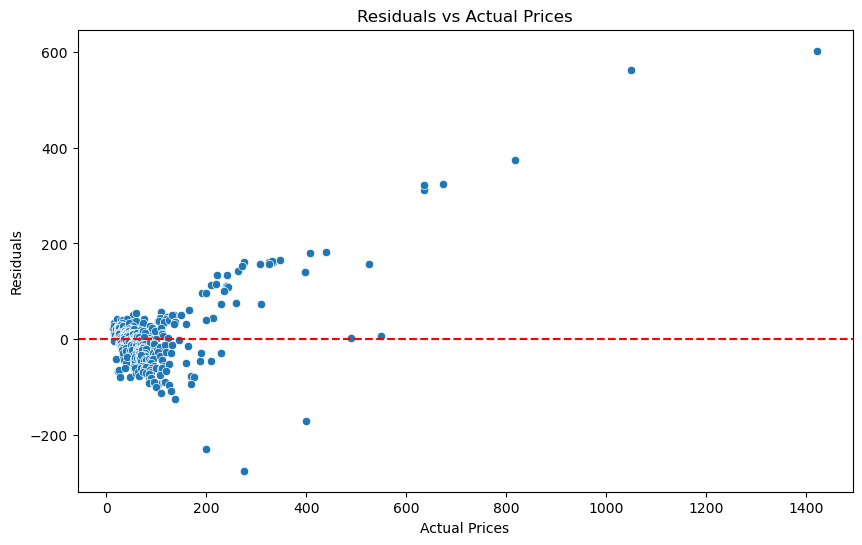

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
predictions_pd = pred.predictions.select("price", "prediction").toPandas()

# Calculate residuals
predictions_pd['residuals'] = predictions_pd['price'] - predictions_pd['prediction']

# Plot residuals vs. actual price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='residuals', data=predictions_pd)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()


# removing outlier in pandas and convert into spark

In [53]:
import seaborn as sns
import numpy as np
df = pd.read_csv("Chennai house data.csv")


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [55]:
df = df.drop(columns = "bathroom")

In [56]:
df["age"].fillna((df["age"].median()),inplace = True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   age       2620 non-null   float64
 5   location  2620 non-null   object 
 6   builder   2620 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 143.4+ KB


In [58]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
df['price'] = np.where(df['price'] > ubound, ubound,np.where(df['price'] < lbound, lbound, df['price']))


42.0 90.0 48.0
-30.0 162.0


<Axes: >

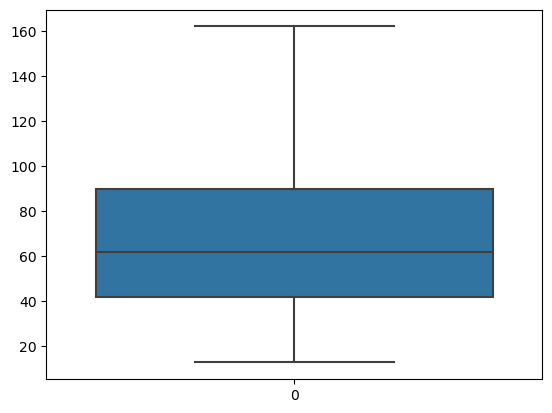

In [59]:
sns.boxplot(df['price'])

In [60]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
df['area'] = np.where(df['area'] > ubound, ubound, 
                        np.where(df['area'] < lbound, lbound, df['area']))


877.0 1471.25 594.25
-14.375 2362.625


<Axes: >

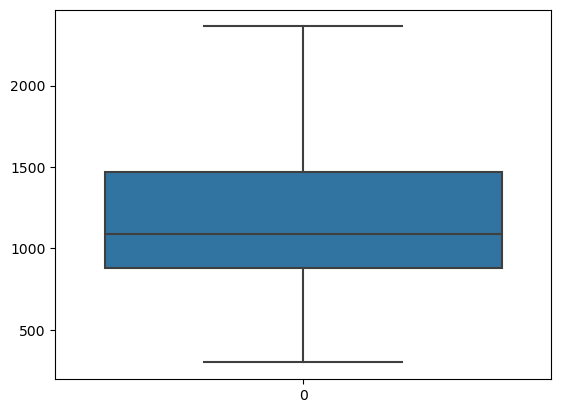

In [61]:
sns.boxplot(df['area'])

In [62]:
Q1 = df['bhk'].quantile(0.25)
Q3 = df['bhk'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
df['bhk'] = np.where(df['bhk'] > ubound, ubound, 
                        np.where(df['bhk'] < lbound, lbound, df['bhk']))


2.0 3.0 1.0
0.5 4.5


<Axes: >

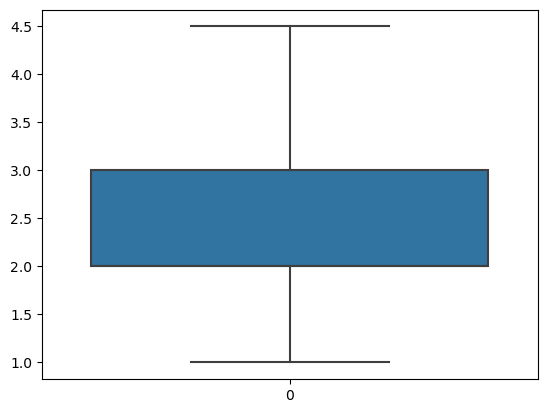

In [63]:
sns.boxplot(df["bhk"])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   float64
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   float64
 4   age       2620 non-null   float64
 5   location  2620 non-null   object 
 6   builder   2620 non-null   object 
dtypes: float64(4), object(3)
memory usage: 143.4+ KB


In [65]:
df.to_csv("filtered_chennai_housing_dataset")

# converting into pandas to spark

In [66]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("p1") \
    .getOrCreate()
# Convert Pandas DataFrame to PySpark DataFrame
df_spark = spark.read.csv("filtered_chennai_housing_dataset",header = True, inferSchema= True)


In [67]:
df_spark.show()


+---+-----+------+------------------+---+---+--------------+--------------------+
|_c0|price|  area|            status|bhk|age|      location|             builder|
+---+-----+------+------------------+---+---+--------------+--------------------+
|  0|37.49| 872.0|     Ready to move|2.0|1.0|     Sembakkam|       MP Developers|
|  1|93.54|1346.0|Under Construction|3.0|0.0|      Selaiyur|       DAC Promoters|
|  2|151.0|2225.0|Under Construction|3.0|0.0|     Mogappair|Casagrand Builder...|
|  3| 49.0|1028.0|     Ready to move|2.0|3.0|      Ambattur|Dugar Housing Bui...|
|  4|42.28| 588.0|Under Construction|2.0|0.0|    Pallavaram|Radiance Realty D...|
|  5|162.0|2221.0|Under Construction|3.0|0.0| Virugambakkam|Traventure Homes ...|
|  6| 38.0| 885.0|Under Construction|3.0|0.0| Thirumazhisai|           Urbanrise|
|  7|72.99| 936.0|     Ready to move|3.0|6.0|    Moolakadai|Navin Housing Pro...|
|  8|125.0|2275.0|     Ready to move|4.0|1.0| Ottiyambakkam|Jones foundation ...|
|  9|24.56| 622.

In [68]:
from pyspark.ml.feature import VectorAssembler,StringIndexer
from pyspark.ml.regression import LinearRegression

In [69]:
Stringed  = StringIndexer(inputCols=["status","location","builder"],outputCols=["status_filtered","location_filtered","builder_filtered"])

In [70]:
df_value = Stringed.fit(df_spark).transform(df_spark)

In [71]:
df_value.show()

+---+-----+------+------------------+---+---+--------------+--------------------+---------------+-----------------+----------------+
|_c0|price|  area|            status|bhk|age|      location|             builder|status_filtered|location_filtered|builder_filtered|
+---+-----+------+------------------+---+---+--------------+--------------------+---------------+-----------------+----------------+
|  0|37.49| 872.0|     Ready to move|2.0|1.0|     Sembakkam|       MP Developers|            0.0|             10.0|            37.0|
|  1|93.54|1346.0|Under Construction|3.0|0.0|      Selaiyur|       DAC Promoters|            1.0|              5.0|             7.0|
|  2|151.0|2225.0|Under Construction|3.0|0.0|     Mogappair|Casagrand Builder...|            1.0|             23.0|             6.0|
|  3| 49.0|1028.0|     Ready to move|2.0|3.0|      Ambattur|Dugar Housing Bui...|            0.0|             21.0|           102.0|
|  4|42.28| 588.0|Under Construction|2.0|0.0|    Pallavaram|Radiance 

In [72]:
df_modify = VectorAssembler(inputCols=["area","bhk","age","status_filtered","location_filtered","builder_filtered"],outputCol="independent_cols")

In [73]:
final = df_modify.transform(df_value)
final.show()

+---+-----+------+------------------+---+---+--------------+--------------------+---------------+-----------------+----------------+--------------------+
|_c0|price|  area|            status|bhk|age|      location|             builder|status_filtered|location_filtered|builder_filtered|    independent_cols|
+---+-----+------+------------------+---+---+--------------+--------------------+---------------+-----------------+----------------+--------------------+
|  0|37.49| 872.0|     Ready to move|2.0|1.0|     Sembakkam|       MP Developers|            0.0|             10.0|            37.0|[872.0,2.0,1.0,0....|
|  1|93.54|1346.0|Under Construction|3.0|0.0|      Selaiyur|       DAC Promoters|            1.0|              5.0|             7.0|[1346.0,3.0,0.0,1...|
|  2|151.0|2225.0|Under Construction|3.0|0.0|     Mogappair|Casagrand Builder...|            1.0|             23.0|             6.0|[2225.0,3.0,0.0,1...|
|  3| 49.0|1028.0|     Ready to move|2.0|3.0|      Ambattur|Dugar Housing Bu

In [74]:
final1 = final.select("independent_cols","price")
final1.show(5)

+--------------------+-----+
|    independent_cols|price|
+--------------------+-----+
|[872.0,2.0,1.0,0....|37.49|
|[1346.0,3.0,0.0,1...|93.54|
|[2225.0,3.0,0.0,1...|151.0|
|[1028.0,2.0,3.0,0...| 49.0|
|[588.0,2.0,0.0,1....|42.28|
+--------------------+-----+
only showing top 5 rows



In [75]:
train_data,test_data = final1.randomSplit([0.8,0.2])

In [76]:
model = LinearRegression(featuresCol="independent_cols",labelCol="price")
model = model.fit(train_data)

In [77]:
model.coefficients

DenseVector([0.072, 1.5785, -0.4623, 2.8214, 0.0929, 0.0598])

In [78]:
model.intercept

-24.21591335928129

In [79]:
pred = model.evaluate(test_data)
pred.predictions.show()

+--------------------+-----+------------------+
|    independent_cols|price|        prediction|
+--------------------+-----+------------------+
|[353.0,1.0,0.0,1....| 18.0|14.976026240607279|
|[450.0,1.0,0.0,0....| 15.0|24.642884464772127|
|[480.0,1.0,0.0,0....| 16.0|17.068088779971713|
|[500.0,1.0,0.0,0....| 29.0|14.585922209819326|
|[500.0,2.0,0.0,1....| 22.0|19.844851018462183|
|[504.0,1.0,0.0,1....| 19.9| 18.64619345747317|
|[505.0,1.0,0.0,0....|24.47|14.448406728167814|
|[510.0,1.0,2.0,0....|19.38|13.712165878504909|
|[520.0,1.0,3.0,0....|18.49|13.431821783182624|
|[520.0,1.0,3.0,0....|19.49|13.431821783182624|
|[576.0,1.0,1.0,0....| 29.0|30.489415457413788|
|[582.0,1.0,0.0,0....|25.02| 22.77074522849325|
|[586.0,1.0,0.0,0....| 27.5|20.501840800079943|
|[586.0,1.0,0.0,0....| 28.0|20.501840800079943|
|[586.0,1.0,0.0,0....| 28.0|20.501840800079943|
|[588.0,2.0,0.0,1....|42.28|26.028355457962352|
|[588.0,2.0,0.0,1....|42.28|26.028355457962352|
|[588.0,2.0,0.0,1....|42.28|26.865833963

In [80]:

print("Root Mean Squared Error (RMSE):", pred.rootMeanSquaredError)
print("R^2 on test data:", (pred.r2)*100,"%")
print("Mean Absolute Error (MAE):", pred.meanAbsoluteError)


Root Mean Squared Error (RMSE): 22.224385308708165
R^2 on test data: 71.52998612952366 %
Mean Absolute Error (MAE): 15.288382918805542


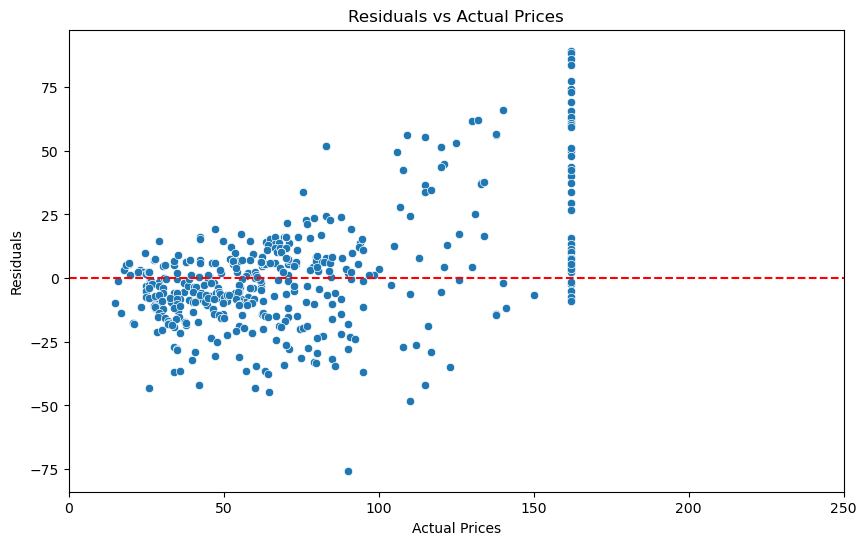

In [84]:
predictions_pd = pred.predictions.select("price", "prediction").toPandas()

# Calculate residuals
predictions_pd['residuals'] = predictions_pd['price'] - predictions_pd['prediction']

# Plot residuals vs. actual price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='residuals', data=predictions_pd)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Prices')
plt.xlabel('Actual Prices')
plt.xlim(0,250)
plt.ylabel('Residuals')
plt.show()